In [1]:
import pandas as pd

# Load Dataset

In [2]:
train = pd.read_csv('C:/Users/bit/Downloads/train.csv', index_col = 'PassengerId')

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# jupyter notebook에 시각화한 내용을 바로 띄워준다. 

%matplotlib inline
import seaborn as sns

# 탑승 위치별 생존자 확인하기

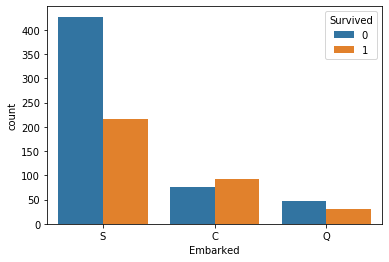

In [4]:
sns.countplot(data=train, x = 'Embarked', hue = 'Survived')

# Pclass별 생존자 확인하기

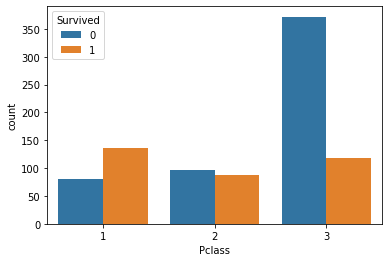

In [8]:
sns.countplot(data=train, x = 'Pclass', hue = 'Survived')

# 형제(SibSp) 별 생존자 확인하기

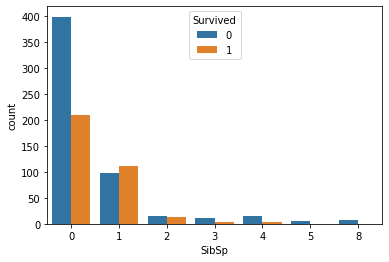

In [9]:
sns.countplot(data=train, x = 'SibSp', hue = 'Survived')

# 가족별 생존자 확인하기

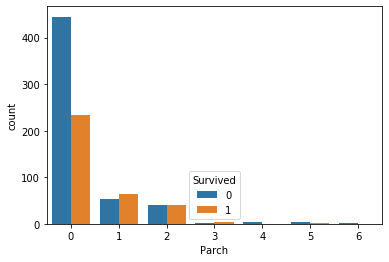

In [10]:
sns.countplot(data=train, x = 'Parch', hue = 'Survived')

# 나이별 생존자 확인하기

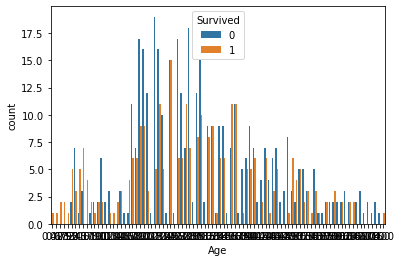

In [11]:
sns.countplot(data=train, x = 'Age', hue = 'Survived')

# 성별 생존자 확인하기 

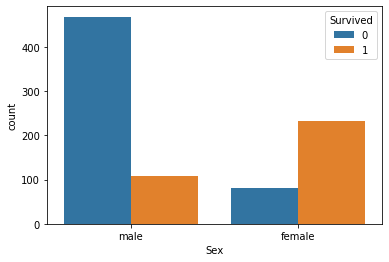

In [19]:
sns.countplot(data=train, x = 'Sex', hue = 'Survived')

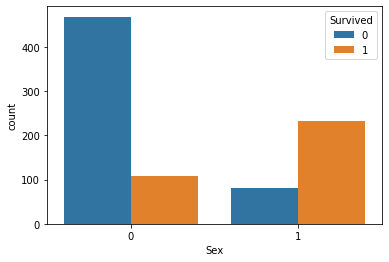

In [21]:
sns.countplot(data=train, x = 'Sex', hue = 'Survived')

## 데이터 전처리

In [5]:
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'

S 에서 탄 사람들의 사망 비율이 더 높다. 죽은 사람을 예측하는 데에 있어 안정적일 것 같다. 

In [20]:
train.loc[train['Sex']== 'male', 'Sex'] = 0 
train.loc[train['Sex']== 'female', 'Sex'] = 1

In [26]:
train_oh = pd.get_dummies(train, columns = ['Embarked', 'SibSp', 'Parch']) 
train_oh

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,C85,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,C123,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.000000,211536,13.0000,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,112053,30.0000,B42,0,0,...,0,0,0,1,0,0,0,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,W./C. 6607,23.4500,NaN,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
train_oh = train_oh.drop(['Cabin', 'Name', 'Ticket', 'Age'], axis = 1)

In [28]:
train_oh

,Survived,Pclass,Sex,Fare,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,0,7.2500,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,71.2833,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,3,1,7.9250,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,53.1000,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,0,3,0,8.0500,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,13.0000,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
888,1,1,1,30.0000,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
889,0,3,1,23.4500,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
y = train['Survived']

In [30]:
X = train_oh.drop('Survived', axis = 1)

In [31]:
test = pd.read_csv('C:/Users/bit/Downloads/test.csv')

In [32]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, )


gbrt = GradientBoostingClassifier(random_state=0, max_depth=3)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.889
테스트 세트 정확도 : 0.798


gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=3)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))